In [1]:
using Pkg
Pkg.add("Interpolations")

    Updating registry at `~/.julia/registries/JuliaComputingRegistry`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Interpolations ─ v0.14.4
    Updating `~/.julia/environments/v1.7/Project.toml`
  [a98d9a8b] + Interpolations v0.14.4
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [a98d9a8b] ↑ Interpolations v0.14.0 ⇒ v0.14.4
Precompiling project...
  ✓ Interpolations
  ✓ ImageTransformations
  ✓ ImageContrastAdjustment
  ✓ ImageQualityIndexes
  ✓ Images
  5 dependencies successfully precompiled in 29 seconds (311 already precompiled)


In [96]:
using Interpolations
A = [sin(x*y) for y in -3.14:0.1:3.14 for x in -3.14:0.1:3.14]
itp = interpolate(reshape(A,length(-3.14:0.1:3.14),length(-3.14:0.1:3.14)),BSpline(Linear()))

63×63 interpolate(::Matrix{Float64}, BSpline(Linear())) with element type Float64:
 -0.421249  -0.120528    0.191979    …  -0.429896  -0.130009    0.182592
 -0.120528   0.182155    0.468134       -0.667151  -0.413576   -0.122073
  0.191979   0.468134    0.704116       -0.850207  -0.661171   -0.415396
  0.485712   0.711182    0.879675       -0.964192  -0.851258   -0.670126
  0.731949   0.88901     0.979744       -0.999845  -0.967305   -0.862595
  0.906609   0.98531     0.995736    …  -0.954272  -0.999217   -0.974924
  0.992614   0.99125     0.926279       -0.831173  -0.944219   -0.996674
  0.981552   0.906287    0.777333       -0.64055   -0.807095   -0.925826
  0.874505   0.738211    0.56168        -0.397889  -0.599771   -0.768961
  0.681942   0.502437    0.297826       -0.122903  -0.34028    -0.540654
  0.422693   0.220585    0.00841459  …   0.162067  -0.0511923  -0.262116
  0.122109  -0.0814948  -0.281719        0.433871   0.242348    0.040774
 -0.190415  -0.376102   -0.547677        

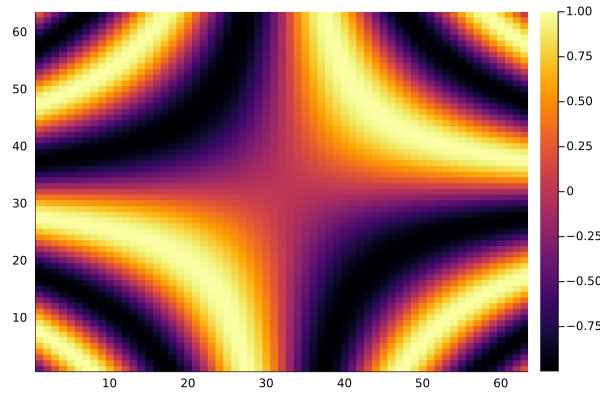

In [97]:
using Plots
Plots.heatmap(reshape(A,length(-3.14:0.1:3.14),length(-3.14:0.1:3.14)))

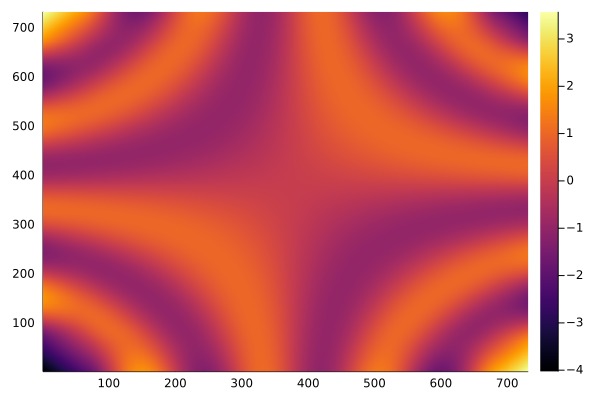

In [98]:
itp = extrapolate(itp, Line())
A_test = zeros(length(-5:0.1:68),length(-5:0.1:68))
i=0  
for x in -5:0.1:68
    i+=1
    j=0
    for y in -5:0.1:68
        j+=1
        A_test[i,j] = itp(x,y)
    end
end
Plots.heatmap(A_test)

In [177]:
include("../src/utils.jl")



function (p::interpolation_wraper)(x)
    x1 = x[1]
end 



In [261]:
include("../src/ValueFunctions.jl")

Main.ValueFunctions

In [262]:
itp = ValueFunctions.init_guasianBeleifsInterp1d_Bsplines(1.0,0.0,2.0,10)


Main.ValueFunctions.guasianBeleifsInterp1d_Bsplines(10, 1.0, 0.0, 0.3465735902799727, AbstractVector{Float64}[[0.05, 0.017328679513998635], [0.15, 0.017328679513998635], [0.25, 0.017328679513998635], [0.35, 0.017328679513998635], [0.45, 0.017328679513998635], [0.55, 0.017328679513998635], [0.65, 0.017328679513998635], [0.75, 0.017328679513998635], [0.85, 0.017328679513998635], [0.95, 0.017328679513998635]  …  [0.05, 0.32924491076597406], [0.15, 0.32924491076597406], [0.25, 0.32924491076597406], [0.35, 0.32924491076597406], [0.45, 0.32924491076597406], [0.55, 0.32924491076597406], [0.65, 0.32924491076597406], [0.75, 0.32924491076597406], [0.85, 0.32924491076597406], [0.95, 0.32924491076597406]], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 10×10 extrapolate(interpolate(::Matrix{Float64}, BSpline(Linear())), Line()) with element type Float64:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [289]:
vals = [sin(5*x[1]*sqrt(x[2])) for x in itp.grid]
ValueFunctions.update!(itp,vals)

10×10 extrapolate(interpolate(::Matrix{Float64}, BSpline(Linear())), Line()) with element type Float64:
 0.0329037  0.0569703  0.0735217  0.0869607  …  0.127114  0.135274  0.142958
 0.0985685  0.170171   0.218976   0.258252      0.373125  0.39592   0.417188
 0.163807   0.281163   0.359695   0.421731      0.595021  0.627586  0.657313
 0.228335   0.388504   0.492637   0.572453      0.77846   0.813316  0.843705
 0.291875   0.490802   0.614927   0.70586       0.911586  0.939514  0.961125
 0.354151   0.586728   0.723921   0.817915   …  0.985795  0.996943  0.999974
 0.414893   0.675037   0.817263   0.905229      0.99629   0.9814    0.957078
 0.473838   0.754582   0.892934   0.965161      0.942394  0.894023  0.835942
 0.530731   0.824331   0.949299   0.995899      0.82759   0.741207  0.64647
 0.585326   0.883378   0.985138   0.996512      0.659297  0.534137  0.40415

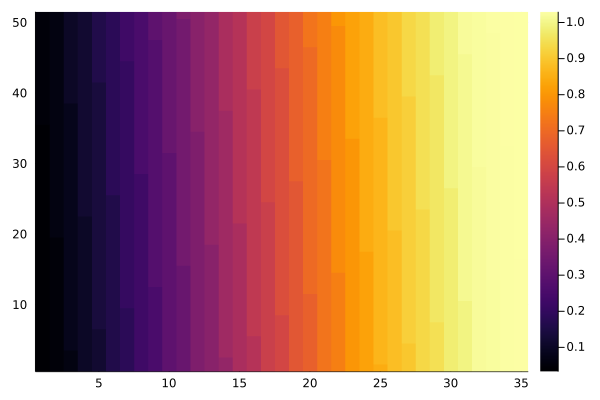

In [290]:
Plots.heatmap(reshape([itp([x,y]) for x in 0.0:0.01:0.5 for y in 0.0:0.01:0.34], length(0.0:0.01:0.5 ), length(0.0:0.01:0.34)))

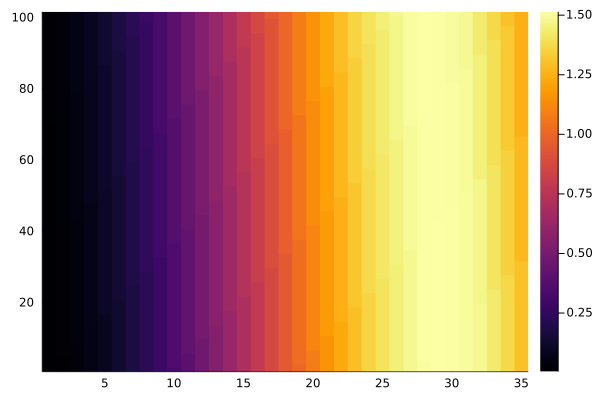

In [294]:
include("../src/BellmanOpperators.jl")
x_hat = [1.0,0.0]
x_cov = [1.0 0.0; 0.0 1.0]
H = [1.0 0.0]
BellmanOpperators.propogate_observation_model(x_hat,x_cov,H, 1.0)

([1.0], [2.0;;])

In [296]:
[1.0 0.0] * x_cov *transpose(H).+1.0

1×1 Matrix{Float64}:
 2.0